# **DOCX, HWP, PDF 파일을 한꺼번에 분석하기**

다양한 문서 형식(**docx, hwp, pdf**)을 한꺼번에 분석하는 파이썬 코드 예제입니다.

아래의 3종류의 파이썬 패키지(**pypandoc, pyhwp, pdfminer**)를 설치한 뒤, 

<font color=blue>각 파일을 일단 텍스트(**txt**) 파일로 변환하여 저장한 뒤</font>, 변환된 텍스트 파일들을 분석합니다.

여기서는 간단한 워드 클라우드 예제를 실행해 보겠습니다.

\-\-\-

샘플 문서로 만료저작물인 현진건의 '운수 좋은 날' 텍스트를 'sample_data' 폴더에 업로드하여 사용합니다.

- 현진건-운수_좋은_날+B3356-개벽.docx
- 현진건-운수_좋은_날+B3356-개벽.hwp
- 현진건-운수_좋은_날+B3356-개벽.pdf

한국어 워드 클라우드 작성에 나눔고딕볼드 폰트를 GitHub 리포지토리에서 가져와서 사용합니다.

https://github.com/ujuc/nanum-font/blob/master/ttf/NanumGothicBold.ttf?raw=true

<br/>

In [ ]:
# 먼저 doc, hwp, pdf를 다루기 위한 파이썬 패키지를 설치합니다.

!pip install pypandoc
!pip install pyhwp
!pip install pdfminer

In [ ]:
# 형태소 분석을 위해 파이썬 한국어 형태소분석기를 설치합니다.

!pip install konlpy

In [3]:
from glob import glob
import pypandoc

files = glob('/content/sample_data/현진건-운수_좋은_날+B3356-개벽.*')
files.sort()
files

['/content/sample_data/현진건-운수_좋은_날+B3356-개벽.docx',
 '/content/sample_data/현진건-운수_좋은_날+B3356-개벽.hwp',
 '/content/sample_data/현진건-운수_좋은_날+B3356-개벽.pdf']

In [4]:
# 각 문서 파일을 텍스트 파일로 변환하여 저장하고,
# 텍스트 파일로부터 문자열로 읽어 들인 후, 리스트(raw_texts)에 보관합니다.

import re

def text2str(f_name):
  text = ""
  with open(f_name) as f:
    lines = f.readlines()
    for line in lines:
        text += line.strip() + ' '
    text = re.sub('\s+',' ',text)
    return text

raw_texts = []

for f_name in files:
  print(f_name)
  extension = f_name[-4:]   # 오른쪽(끝)에서부터 왼쪽으로 네 번째까지 글자들을 추출-->파일 확장자 추출
  if 'hwp' in extension:
    !hwp5txt --output 'hwp.txt' '$f_name'
    raw_texts.append(text2str('hwp.txt'))
  elif 'pdf' in extension:
    !pdf2txt.py -o pdf.txt '$f_name'
    raw_texts.append(text2str('pdf.txt'))
  elif 'doc' in extension:
    pypandoc.convert_file(f_name, 'plain', outputfile="doc.txt")
    raw_texts.append(text2str('doc.txt'))

len(raw_texts)

/content/sample_data/현진건-운수_좋은_날+B3356-개벽.docx
/content/sample_data/현진건-운수_좋은_날+B3356-개벽.hwp
/content/sample_data/현진건-운수_좋은_날+B3356-개벽.pdf


3

In [5]:
# 각 텍스트의 문자열 크기를 확인합니다.

for i, each in enumerate(raw_texts):
  print(len(each), files[i])

10342 /content/sample_data/현진건-운수_좋은_날+B3356-개벽.docx
10342 /content/sample_data/현진건-운수_좋은_날+B3356-개벽.hwp
10331 /content/sample_data/현진건-운수_좋은_날+B3356-개벽.pdf


In [6]:
raw_texts[1]

'운수 좋은날 현진건 새침하게 흐린 품이 눈이 올 듯하더니 눈은 아니 오고 얼다가 만 비가 추 적추적 내리는 날이었다. 이날이야말로 동소문 안에서 인력거꾼 노릇을 하는 김첨지에게는 오래간만 에도 닥친 운수 좋은 날이었다. 문안에(거기도 문밖은 아니지만) 들어간답 시는 앞집 마마님을 전찻길까지 모셔다 드린 것을 비롯으로 행여나 손님이 있을까 하고 정류장에서 어정어정하며 내리는 사람 하나하나에게 거의 비는 듯한 눈결을 보내고 있다가 마침내 교원인 듯한 양복쟁이를 동광학교(東光 學校)까지 태워다 주기로 되었다. 첫 번에 삼십전 , 둘째 번에 오십전 - 아침 댓바람에 그리 흉치 않은 일이 었다. 그야말로 재수가 옴붙어서 근 열흘 동안 돈 구경도 못한 김첨지는 십 전짜리 백동화 서 푼, 또는 다섯 푼이 찰깍 하고 손바닥에 떨어질 제 거의 눈물을 흘릴 만큼 기뻤었다. 더구나 이날 이때에 이 팔십 전이라는 돈이 그 에게 얼마나 유용한지 몰랐다. 컬컬한 목에 모주 한 잔도 적실 수 있거니와 그보다도 앓는 아내에게 설렁탕 한 그릇도 사다 줄 수 있음이다. 그의 아내가 기침으로 쿨룩거리기는 벌써 달포가 넘었다. 조밥도 굶기를 먹다시피 하는 형편이니 물론 약 한 첩 써본 일이 없다. 구태여 쓰려면 못 쓸 바도 아니로되 그는 병이란 놈에게 약을 주어 보내면 재미를 붙여서 자 꾸 온다는 자기의 신조(信條)에 어디까지 충실하였다. 따라서 의사에게 보 인 적이 없으니 무슨 병인지는 알 수 없으되 반듯이 누워 가지고 일어나기 는 새로 모로도 못 눕는 걸 보면 중증은 중증인 듯. 병이 이대도록 심해지 기는 열흘전에 조밥을 먹고 체한 때문이다. 그때도 김첨지가 오래간만에 돈 을 얻어서 좁쌀 한 되와 십 전짜리 나무 한 단을 사다 주었더니 김첨지의 말에 의지하면 그 오라질 년이 천방지축으로 냄비에 대고 끓였다. 마음은 급하고 불길은 달지 않아 채 익지도 않은 것을 그 오라질년이 숟가락은 고 만두고 손으로 움켜서 두 뺨에 주먹덩이 같은 혹이 불거지도록 누가 빼앗을 듯이 처박질하더니만 그날 저녁부

## **워드 클라우드 생성**

In [ ]:
# 한글 폰트를 sample_data 폴더에 다운로드 합니다.

!wget https://github.com/ujuc/nanum-font/blob/master/ttf/NanumGothicBold.ttf?raw=true -P /content/sample_data

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter
from konlpy.tag import Okt

1020 /content/sample_data/현진건-운수_좋은_날+B3356-개벽.docx
[('김첨', 28), ('소리', 24), ('듯이', 17), ('인력거', 13), ('얼굴', 13), ('이의', 11), ('정거장', 11), ('오늘', 11), ('사람', 10), ('자기', 10), ('하나', 8), ('거리', 8), ('설렁탕', 7), ('마음', 7), ('얼마', 6), ('다리', 6), ('운수', 5), ('손님', 5), ('아내', 5), ('벌써', 5)]
1020 /content/sample_data/현진건-운수_좋은_날+B3356-개벽.hwp
[('김첨', 28), ('소리', 24), ('듯이', 17), ('인력거', 13), ('얼굴', 13), ('이의', 11), ('정거장', 11), ('오늘', 11), ('사람', 10), ('자기', 10), ('하나', 8), ('거리', 8), ('설렁탕', 7), ('마음', 7), ('얼마', 6), ('다리', 6), ('운수', 5), ('손님', 5), ('아내', 5), ('벌써', 5)]
1020 /content/sample_data/현진건-운수_좋은_날+B3356-개벽.pdf
[('김첨', 28), ('소리', 25), ('듯이', 18), ('인력거', 13), ('얼굴', 13), ('사람', 11), ('정거장', 11), ('오늘', 11), ('자기', 10), ('거리', 8), ('이의', 8), ('하나', 7), ('설렁탕', 7), ('마음', 7), ('손님', 6), ('얼마', 6), ('운수', 5), ('오십', 5), ('아내', 5), ('벌써', 5)]


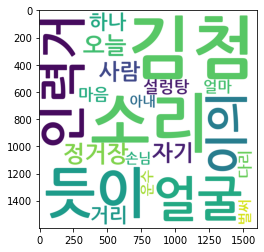

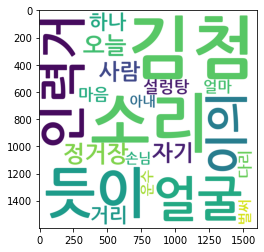

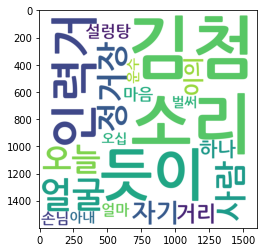

In [9]:
 # 각 파일별로 명사를 추출하여 워드 클라우드를 생성합니다.

for i, each in enumerate(raw_texts):
  okt = Okt()
  nouns = okt.nouns(each)
  nouns = [n for n in nouns if len(n) > 1]   # 글자수가 1보다 많은, 즉 2 이상인 명사를 추출
  print(len(nouns), files[i])

  c = Counter(nouns)
  c_common_tuple = c.most_common(20)   # 빈도 상위 20위 명사 추출
  print(c_common_tuple)

  c_dict = dict((x, y) for x, y in c_common_tuple)

  wc = WordCloud(width=800, height=800, scale=2.0, max_font_size=250, background_color="white", 
                 font_path='/content/sample_data/NanumGothicBold.ttf?raw=true',
                 random_state=42)
  gen = wc.generate_from_frequencies(c_dict)
  plt.figure()
  plt.imshow(gen)